# Excercise 4: Using random variables.

# 1. Implementing your own binomial distribution.

In [17]:
import numpy as np
import matplotlib.pylab as plt

(array([51.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 49.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

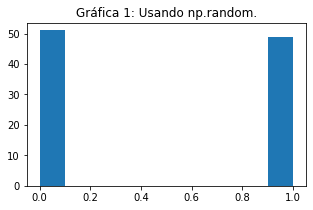

In [18]:
dist = np.random.binomial(1,0.5,100)

plt.figure(figsize=(5,3))
plt.title(u"Gráfica 1: Usando np.random.")
plt.hist(dist)

(array([50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

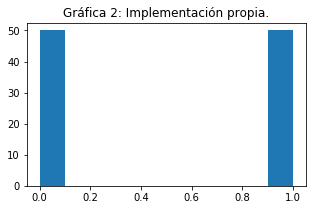

In [19]:
def binomial(p):
    a = np.random.random(100)
    b = []
    for i in range(len(a)):
        if(a[i]<p):
            b.append(0)
        if(a[i]>=p):
            b.append(1)
    return b
            
o = binomial(0.5)

plt.figure(figsize=(5,3))
plt.title(u"Gráfica 2: Implementación propia.")
plt.hist(o)

# Exercise 2: Kinetic gas theory.

1. _Velocidades._

In [20]:
vx = np.random.normal(0,1,100000)
vy = np.random.normal(0,1,100000)
vz = np.random.normal(0,1,100000)

Text(0.5, 1.0, 'Gráfica 2: vx, vy, vz.')

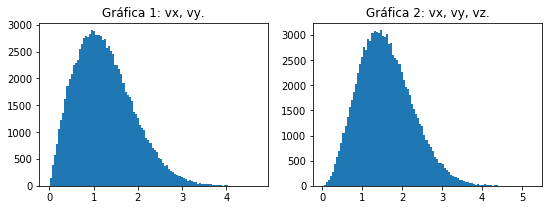

In [21]:
fig2 = plt.figure(figsize=(9,3))

a = fig2.add_subplot(1,2,1)
hist,bins,_ = a.hist(np.sqrt(vx**2+vy**2), bins=100)
a.set_title(u"Gráfica 1: vx, vy.")

b = fig2.add_subplot(1,2,2)
hist1,bins1,__ = b.hist(np.sqrt(vx**2+vy**2+vz**2), bins=100)
b.set_title(u"Gráfica 2: vx, vy, vz.")

2. _Fit._

In [22]:
def dist2d(v,a):
    return (a*v*np.exp(-(a*(v**2))/2))

from scipy.optimize import curve_fit

x = (bins[1:]+bins[:-1])*0.5
y = np.copy(hist)
param = curve_fit(dist2d, x, y)[0]

def dist3d(v,a):
    return (np.sqrt(2/np.pi)*((a)**(3/2))*(v**2)*np.exp(-(a*(v**2))/2))

x1 = (bins1[1:]+bins1[:-1])*0.5
y1 = np.copy(hist1)
param1 = curve_fit(dist3d, x1, y1)[0]

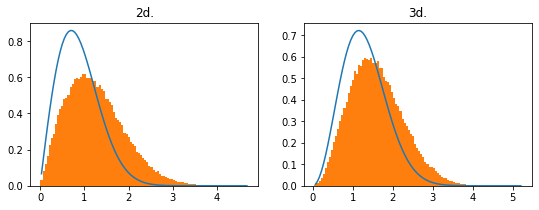

In [32]:
fig = plt.figure(figsize=(9,3))

a = fig.add_subplot(1,2,1)
a.plot(x, dist2d(x,*param))
a.hist(np.sqrt(vx**2+vy**2), bins=100, density=True)
a.set_title("2d.")

b = fig.add_subplot(1,2,2)
b.plot(x1, dist3d(x1,*param1))
b.hist(np.sqrt(vx**2+vy**2+vz**2), bins=100, density=True)
b.set_title("3d.")

plt.show()